<a href="https://colab.research.google.com/github/anusha-k-k/unsupervised_learning/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


Downloading...
From: https://drive.google.com/uc?id=15Ffak9Bu3XNslR9XJy39_0G84MYOYB5M
To: /content/customer_data.csv
100%|██████████| 3.98k/3.98k [00:00<00:00, 7.72MB/s]



📊 Sample Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


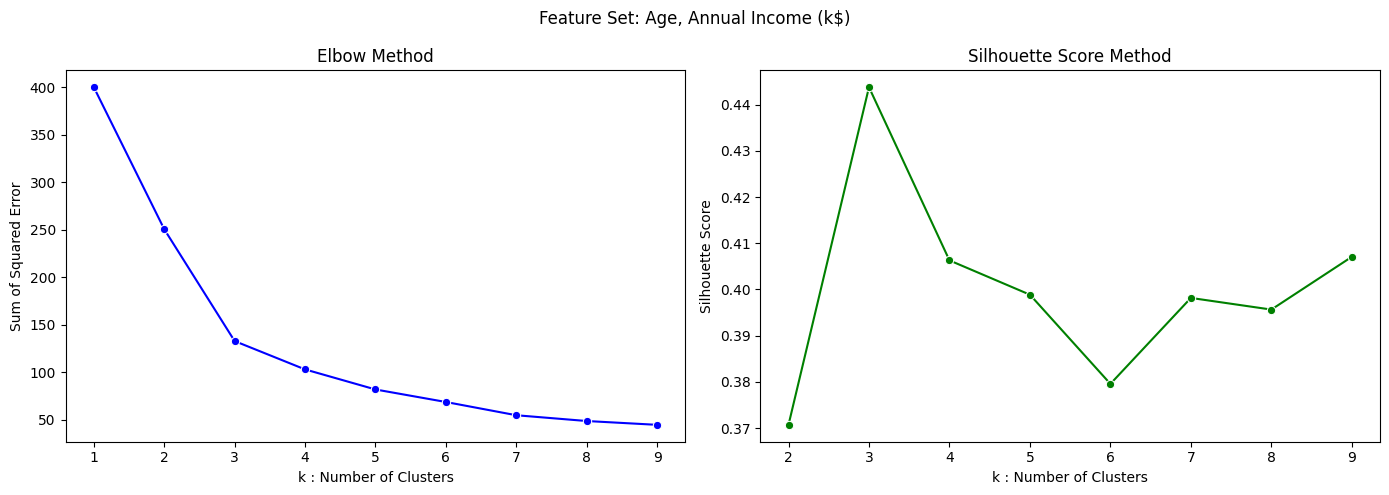

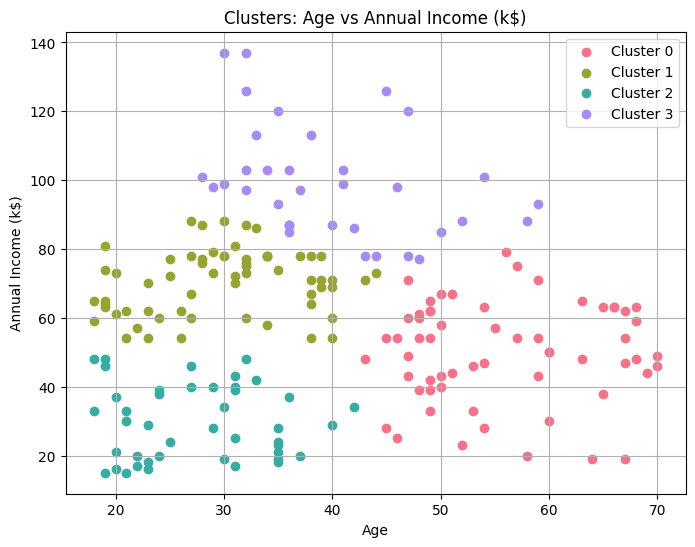

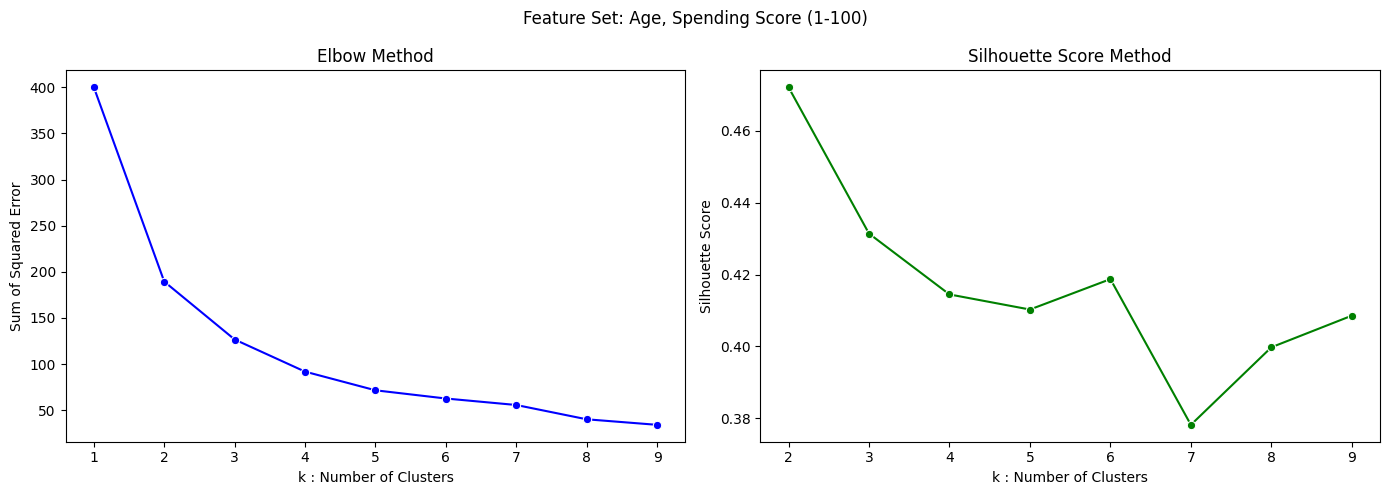

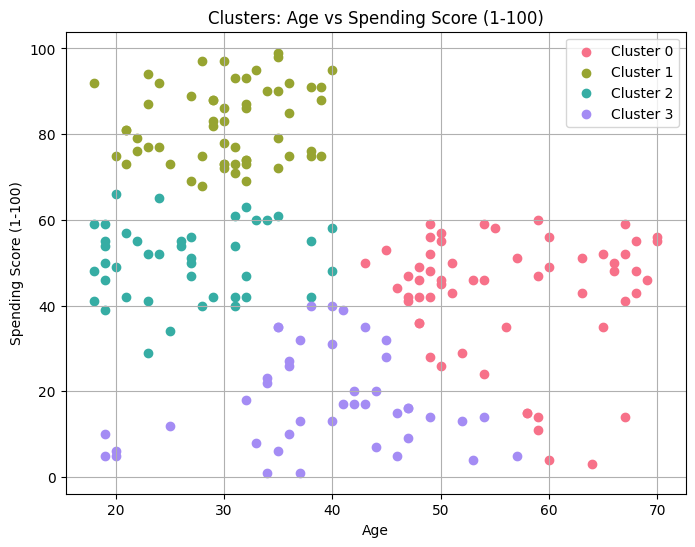

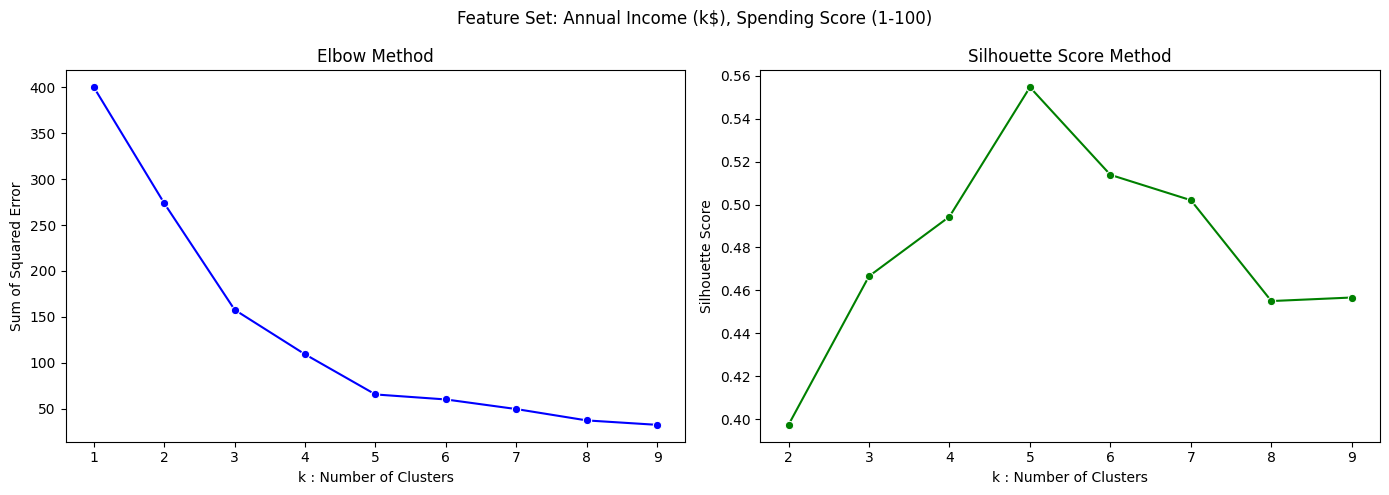

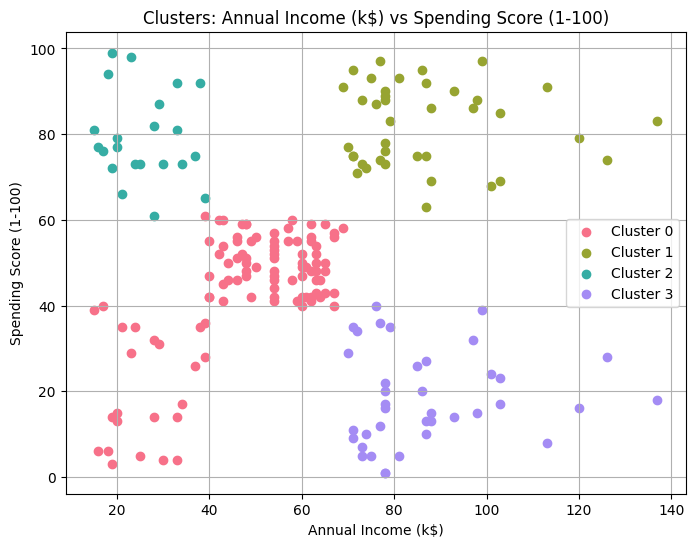

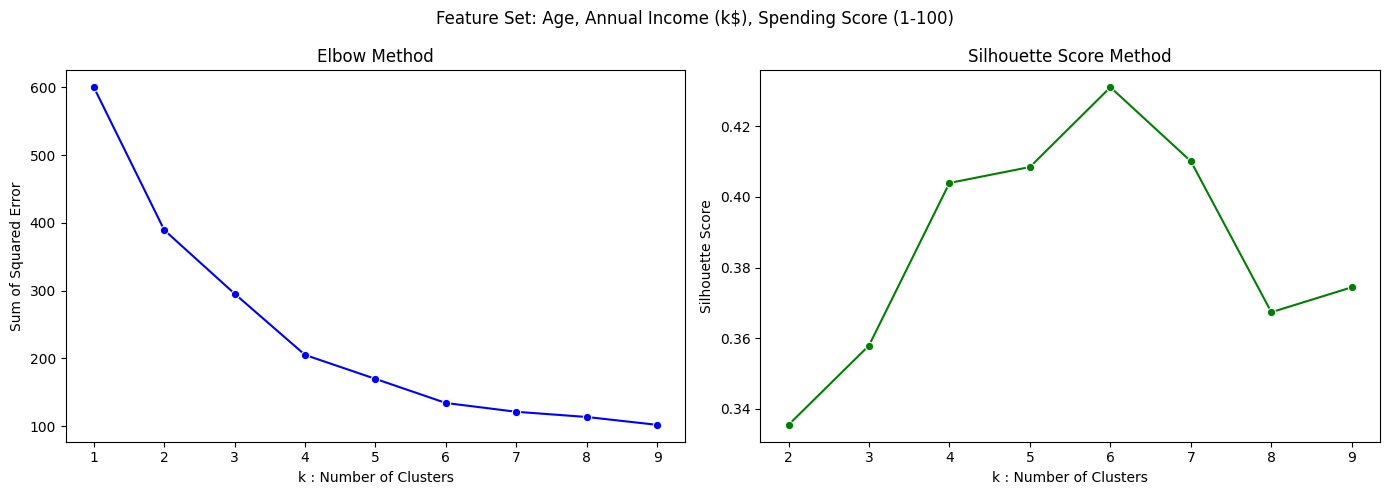

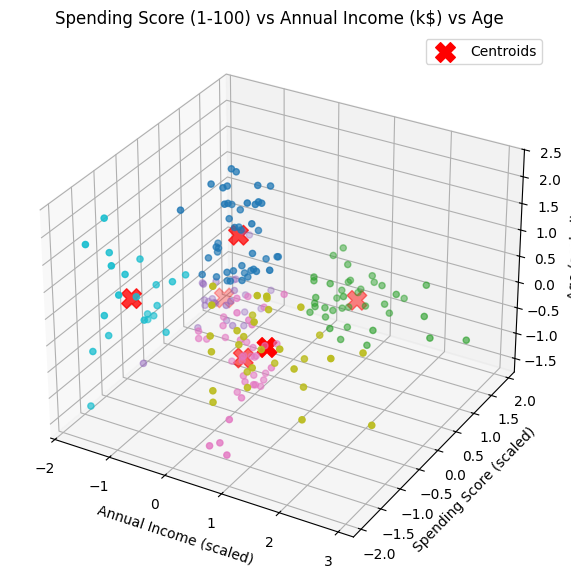


📋 Results Table:
Original Dataset :
Sr. No.	Feature Combination		Number of Clusters
1.	Age - Annual Income (k$)		4
2.	Age - Spending Score (1-100)		4
3.	Annual Income (k$) - Spending Score (1-100)		4
4.	Age - Annual Income (k$) - Spending Score (1-100)		6

Conclusion: Based on various feature combinations, K-Means was applied and best number of clusters was selected using Elbow and Silhouette methods. 3D clustering gives better visualization for Age, Income and Spending Score together.

✅ Made by Sai Sunil Gawaskar

✅ Made by Anusha K K

✅ Made by Suraj KS

✅ Made by Fahmidha K

✅ Made by Roobiksri


In [ ]:
# 📌 Project Title: Customer Segmentation using Unsupervised Learning (K-Means Clustering) major project
#  Team Members:
#     - SAI SUNIL GAWASKAR
#     -   ANUSHA K K
#     - SURAJ KS
#     -  FAHMIDHA K
#     - ROOBIKA SRI
#     - Saravana Kumar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# STEP 2: Mount Google Drive and load CSV
from google.colab import drive
import os
import gdown

drive.mount('/content/drive')

# Download the file from Google Drive link
url = 'https://drive.google.com/uc?id=15Ffak9Bu3XNslR9XJy39_0G84MYOYB5M'
gdown.download(url, 'customer_data.csv', quiet=False)

file_path = 'customer_data.csv'

# STEP 3: Load the data
df = pd.read_csv(file_path)
print("\n📊 Sample Data:")
print(df.head())

# STEP 4: Select multiple feature combinations
features_list = [
    ['Age', 'Annual Income (k$)'],
    ['Age', 'Spending Score (1-100)'],
    ['Annual Income (k$)', 'Spending Score (1-100)'],
    ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
]

results = []

for features in features_list:
    # Original Data
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Elbow and Silhouette Methods
    sse = {}
    sil = []
    kmax = 10

    fig, ax = plt.subplots(1,2, figsize=(14,5))

    for k in range(1, kmax):
        kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(X_scaled)
        sse[k] = kmeans.inertia_

    sns.lineplot(x = list(sse.keys()), y = list(sse.values()), ax=ax[0], marker="o", color='blue')
    ax[0].set_title('Elbow Method')
    ax[0].set_xlabel("k : Number of Clusters")
    ax[0].set_ylabel("Sum of Squared Error")

    for k in range(2, kmax):
        kmeans = KMeans(n_clusters = k, random_state=42).fit(X_scaled)
        labels = kmeans.labels_
        sil.append(silhouette_score(X_scaled, labels))

    sns.lineplot(x = range(2,kmax), y = sil, ax=ax[1], marker="o", color='green')
    ax[1].set_title('Silhouette Score Method')
    ax[1].set_xlabel("k : Number of Clusters")
    ax[1].set_ylabel("Silhouette Score")

    plt.suptitle(f"Feature Set: {', '.join(features)}")
    plt.tight_layout()
    plt.show()

    # Final Model - Use K=4,5,6 based on feature count
    k_final = 4 if len(features) == 2 else 6
    model = KMeans(n_clusters = k_final, random_state=42)
    df_clustered = df.copy()
    df_clustered['Cluster'] = model.fit_predict(X_scaled)

    # Plotting Clusters (2D only)
    if len(features) == 2:
        plt.figure(figsize=(8,6))
        palette = sns.color_palette("husl", k_final)
        for i in range(k_final):
            plt.scatter(
                df_clustered[df_clustered['Cluster']==i][features[0]],
                df_clustered[df_clustered['Cluster']==i][features[1]],
                label=f'Cluster {i}',
                color=palette[i % len(palette)]
            )
        plt.xlabel(features[0])
        plt.ylabel(features[1])
        plt.title(f'Clusters: {features[0]} vs {features[1]}')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Save Results
    results.append((features, k_final))

# 3D CLUSTER PLOT
try:
    model = KMeans(n_clusters = 6, max_iter = 1000, random_state=42)
    m2 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
    scaler = StandardScaler()
    m2_scaled = scaler.fit_transform(m2)
    model.fit(m2_scaled)
    cluster = model.cluster_centers_
    centroids = np.array(cluster)
    labels = model.labels_

    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    x = m2_scaled[:,1]
    y = m2_scaled[:,2]
    z = m2_scaled[:,0]

    scatter = ax.scatter(x, y, z, c=labels, cmap='tab10')
    ax.scatter(centroids[:,1], centroids[:,2], centroids[:,0], marker = "X", color = 'red', s=200, label='Centroids')
    plt.title('Spending Score (1-100) vs Annual Income (k$) vs Age')
    ax.set_xlabel('Annual Income (scaled)')
    ax.set_ylabel('Spending Score (scaled)')
    ax.set_zlabel('Age (scaled)')
    ax.legend()
    plt.show()
except Exception as e:
    print("3D plot could not be generated:", e)

# FINAL RESULTS TABLE
print("\n📋 Results Table:")
print("Original Dataset :")
print("Sr. No.\tFeature Combination\t\tNumber of Clusters")
for i, (features, k) in enumerate(results, 1):
    print(f"{i}.\t{ ' - '.join(features)}\t\t{k}")

print("\nConclusion: Based on various feature combinations, K-Means was applied and best number of clusters was selected using Elbow and Silhouette methods. 3D clustering gives better visualization for Age, Income and Spending Score together.")

print("\n✅ Made by Sai Sunil Gawaskar")

print("\n✅ Made by Anusha K K")

print("\n✅ Made by Suraj KS")

print("\n✅ Made by Fahmidha K")

print("\n✅ Made by Roobiksri")
